In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('bdd100k_labels_images_train.json') as f:
    full_data = json.load(f)

In [3]:
data = full_data

In [4]:
object_numbers = {}

for photo in data:
    for obj in photo['labels']:
        if obj.get('box2d'):
            x1 = obj['box2d']['x1']
            x2 = obj['box2d']['x2']
            y1 = obj['box2d']['y1']
            y2 = obj['box2d']['y2']
            if object_numbers.get(obj['category']):
                object_numbers[obj['category']].append((x2-x1)*(y2-y1))
            else:
                object_numbers[obj['category']] = [(x2-x1)*(y2-y1)]

In [5]:
object_numbers.keys()

dict_keys(['traffic light', 'traffic sign', 'car', 'person', 'bus', 'truck', 'rider', 'bike', 'motor', 'train'])

In [6]:
df = pd.DataFrame(object_numbers['traffic light'])

In [7]:
object_numbers['traffic light'].sort()
object_numbers['traffic light']

[0.9366393988381135,
 1.3636774520001036,
 1.4986148361290492,
 1.991796429618014,
 2.2407729792140283,
 2.987695642374004,
 2.9972455866078147,
 4.147199999999987,
 4.311680570567821,
 5.328413202954117,
 6.456061449504005,
 6.743785431334245,
 7.654102303821731,
 7.967162765704717,
 7.967163763650026,
 7.967177734896076,
 8.9630589846196,
 8.963067966135805,
 10.560916387225719,
 10.856463758919837,
 11.051248358451701,
 11.051265988439624,
 11.39511170281457,
 11.482160723420126,
 11.539681899275651,
 11.88782600818107,
 12.45511162184889,
 12.455120356127868,
 12.697698745999825,
 12.935041711703965,
 12.946671802782145,
 13.48760513975315,
 13.504597857029857,
 14.012010400643833,
 14.012010400643833,
 14.012010400644472,
 14.012014143905859,
 14.499349440967965,
 14.526136240127606,
 14.579983800004225,
 14.580002699998717,
 14.917007247926016,
 15.140733806795987,
 15.330429594985082,
 15.568900445159851,
 16.11072756639024,
 16.140163954625475,
 17.002940956275726,
 17.12579048

In [8]:
obj_test = object_numbers['traffic light'][:int(len(object_numbers['traffic light'])*0.97)]
obj_test

[0.9366393988381135,
 1.3636774520001036,
 1.4986148361290492,
 1.991796429618014,
 2.2407729792140283,
 2.987695642374004,
 2.9972455866078147,
 4.147199999999987,
 4.311680570567821,
 5.328413202954117,
 6.456061449504005,
 6.743785431334245,
 7.654102303821731,
 7.967162765704717,
 7.967163763650026,
 7.967177734896076,
 8.9630589846196,
 8.963067966135805,
 10.560916387225719,
 10.856463758919837,
 11.051248358451701,
 11.051265988439624,
 11.39511170281457,
 11.482160723420126,
 11.539681899275651,
 11.88782600818107,
 12.45511162184889,
 12.455120356127868,
 12.697698745999825,
 12.935041711703965,
 12.946671802782145,
 13.48760513975315,
 13.504597857029857,
 14.012010400643833,
 14.012010400643833,
 14.012010400644472,
 14.012014143905859,
 14.499349440967965,
 14.526136240127606,
 14.579983800004225,
 14.580002699998717,
 14.917007247926016,
 15.140733806795987,
 15.330429594985082,
 15.568900445159851,
 16.11072756639024,
 16.140163954625475,
 17.002940956275726,
 17.12579048

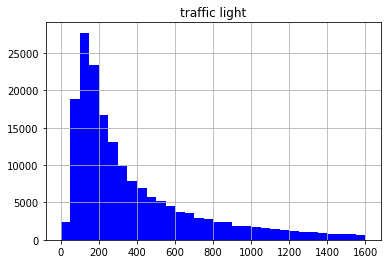

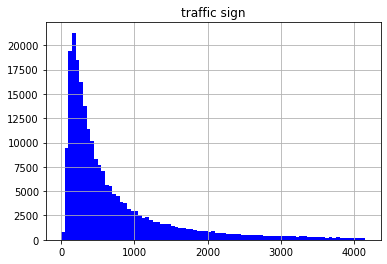

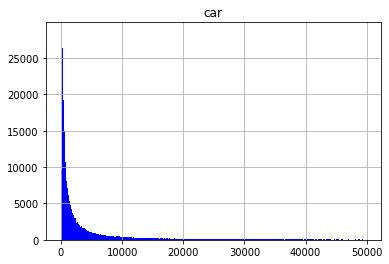

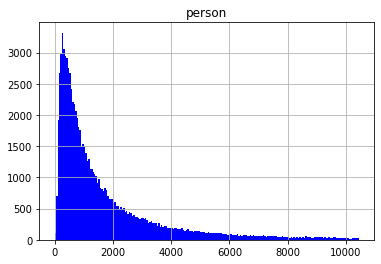

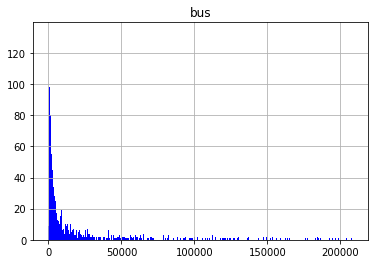

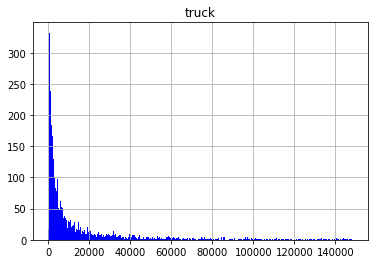

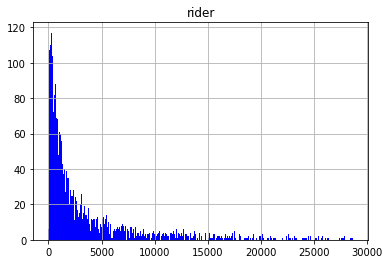

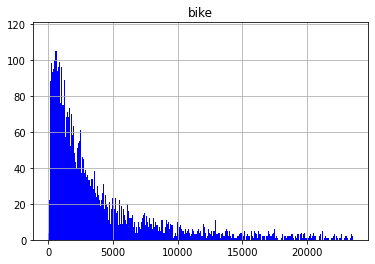

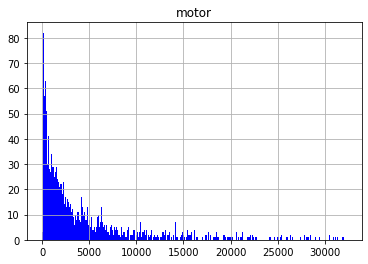

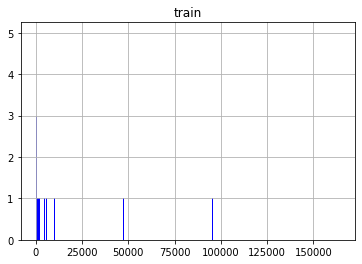

In [9]:
for obj in object_numbers.keys():
    df = pd.DataFrame(object_numbers[obj])
    obj_list = object_numbers[obj].sort()
    obj_max = object_numbers[obj][:int(len(object_numbers[obj])*0.95)][-1]
    bins = np.arange(0,obj_max,50)
    df.hist(bins=bins,color='blue')
    plt.title(obj)